In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!gdown 1DacIYqKLp59C08m01NPPtNHeA8IZK9-D

Downloading...
From: https://drive.google.com/uc?id=1DacIYqKLp59C08m01NPPtNHeA8IZK9-D
To: /content/yulu.csv
100% 648k/648k [00:00<00:00, 102MB/s]


In [3]:
df=pd.read_csv('yulu.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


##EDA on the data

In [4]:
df.shape

(10886, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df['season']=df['season'].astype('object')
df['holiday'] = df['holiday'].astype('object')
df['workingday'] = df['workingday'].astype('object')
df['weather'] = df['weather'].astype('object')
df['datetime'] =pd.to_datetime(df['datetime'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [8]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [9]:
df.describe(include='object')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [10]:
df[df.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [11]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

###Observations:
- There are no null records or columns or duplicate records.
- Data types for columns named season, working day, weather, holiday was initially set to 'int', changed that to 'object' kind.
- The casual and registered columns seems likely to have outliers.

## Visual Analysis

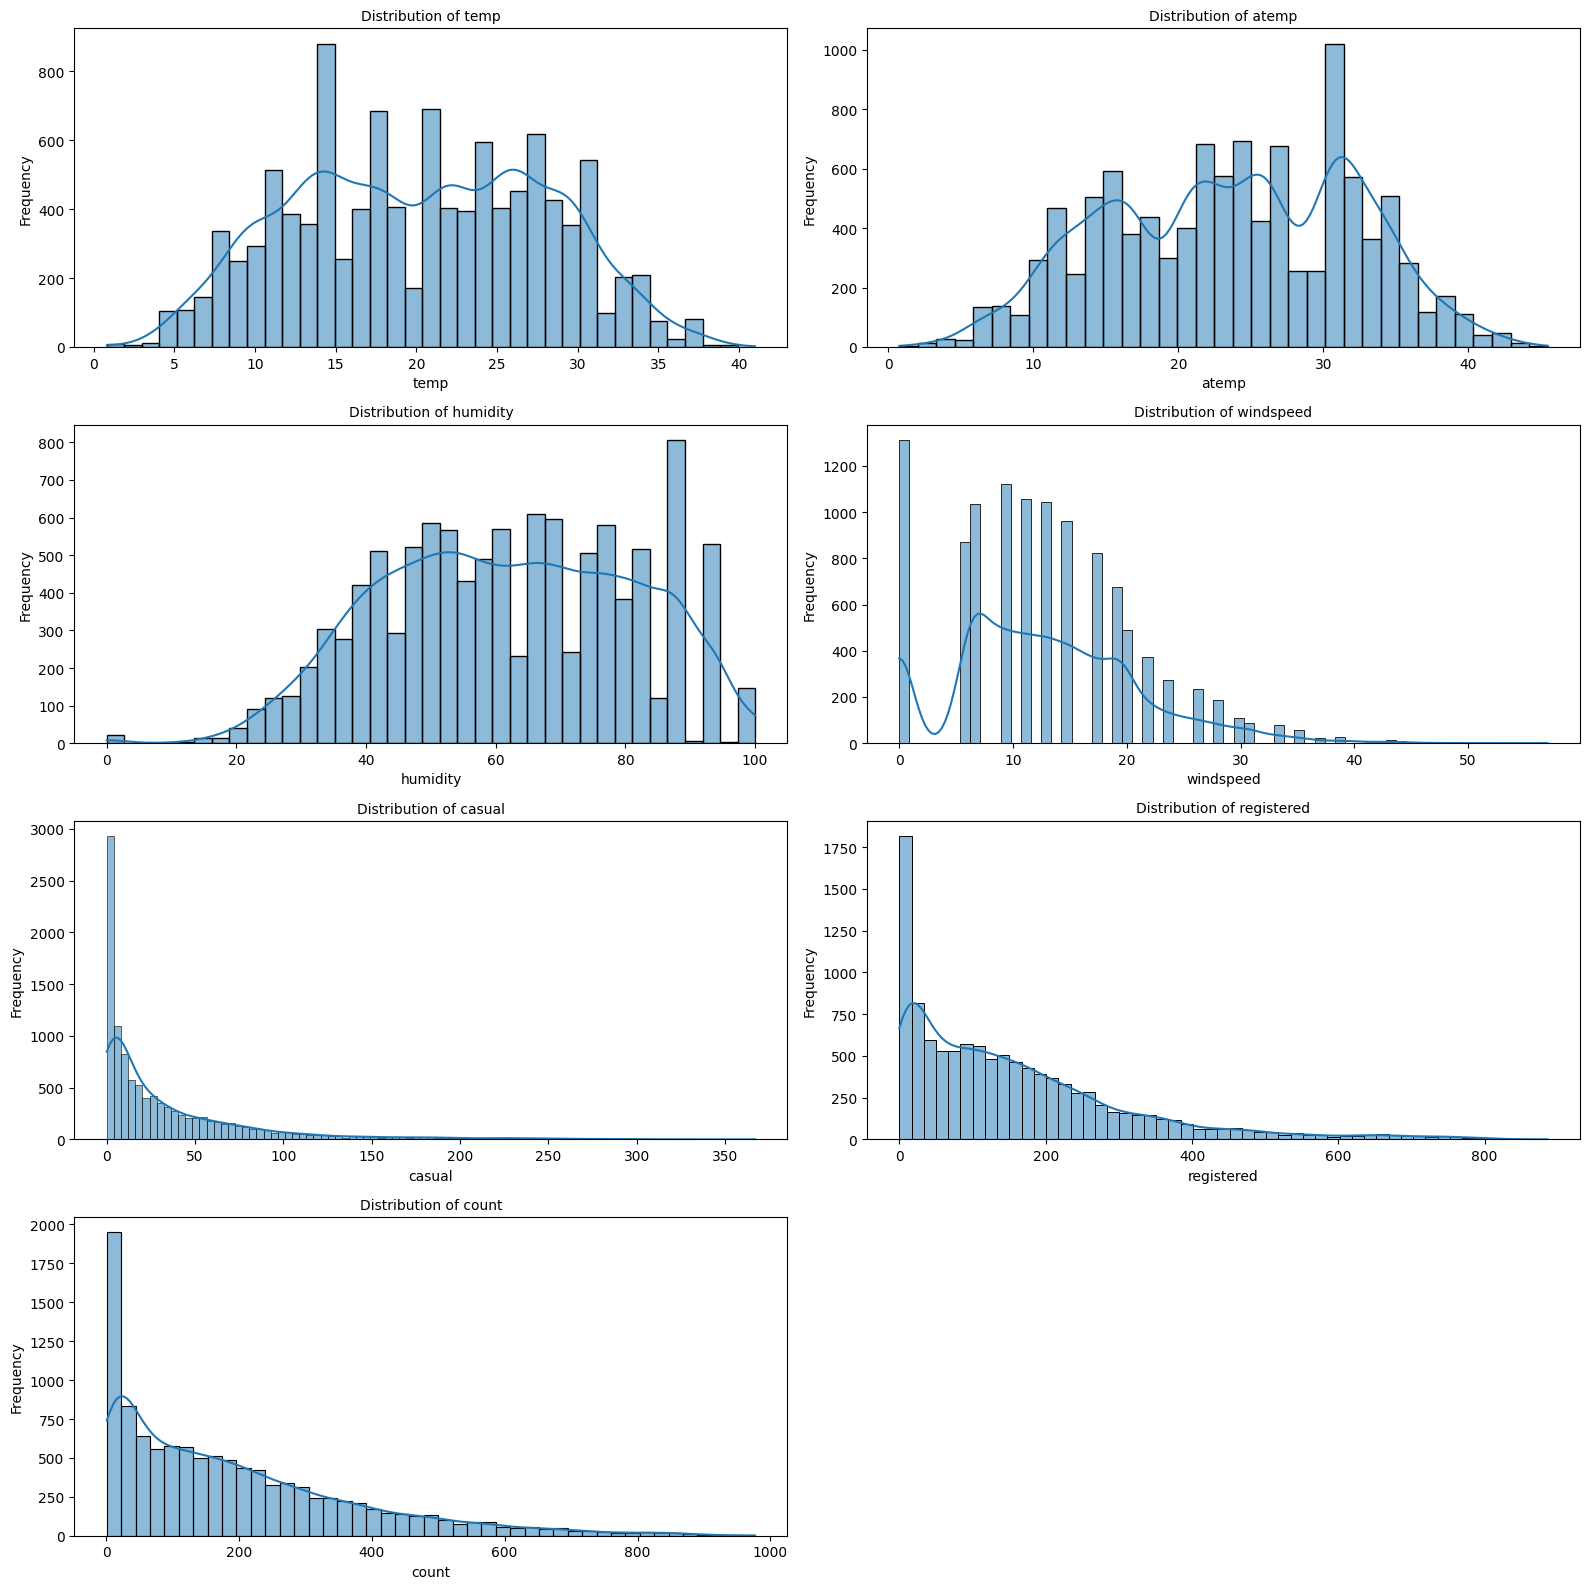

In [12]:
##For Continuous/Numeric Variables
continuous_variables = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
plt.figure(figsize=(16, 16))
for i,col in enumerate(continuous_variables):
  plt.subplot(4,2,i+1)
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}',fontdict={'fontsize':10})
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

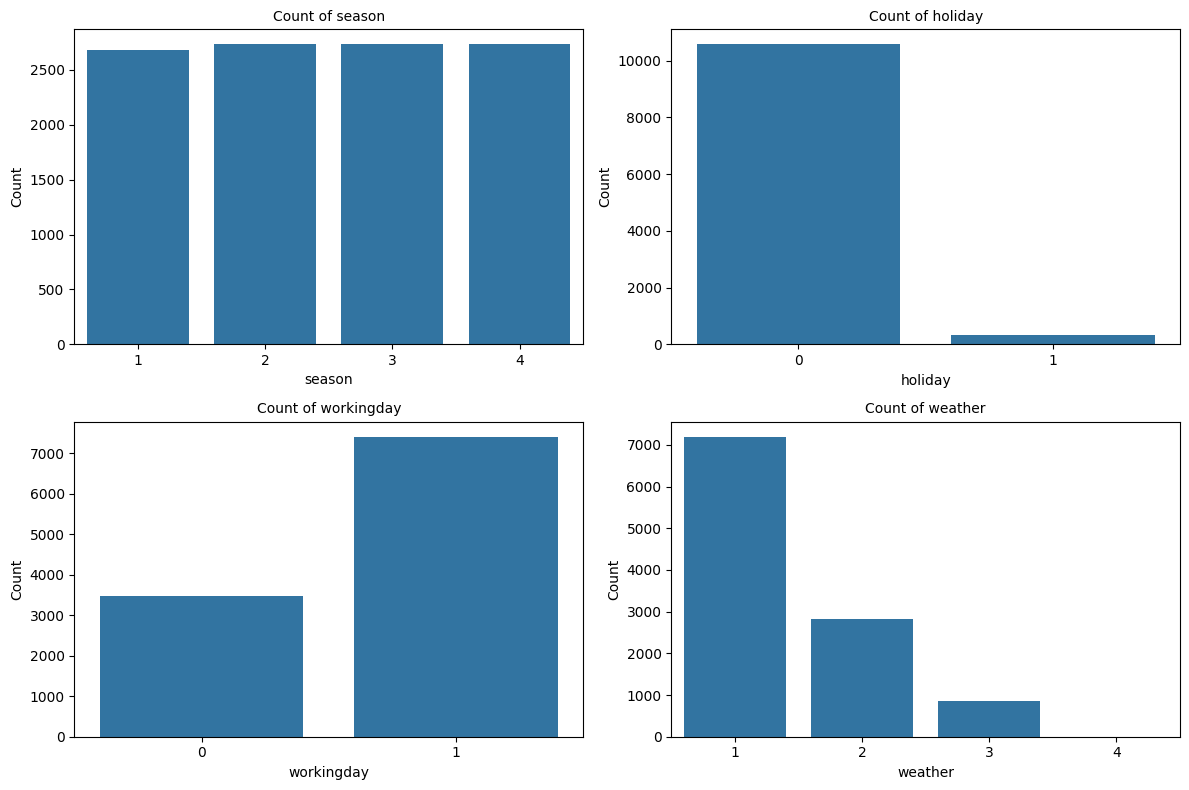

In [13]:
##For Categorical Variables
categorical_variables = ['season', 'holiday', 'workingday', 'weather']
plt.figure(figsize=(12, 8))
for i,col in enumerate(categorical_variables):
  plt.subplot(2,2,i+1)
  sns.countplot(x=col,data=df)
  plt.title(f'Count of {col}',fontdict={'fontsize':10})
  plt.ylabel('Count')
plt.tight_layout()
plt.show()

###Observation
- ***Across Continuous Variables:***
  - For **temp (Temperature) and atemp (Feels like Temperature)** columns  almost have similar distribution and spread across quite good temperature range
  - For **Humidity** the distribution seems normal in first half though there is slight increase in frequencey at higher humidity levels.
  - For **Windspeed** the distribution is mostly gathered at low to to medium windspeed showing that high wind speed us not common.
  - For **Casual user,** we see that the distribution is mostly highly right skewed, which means very larger number of casual users use the app for less number of times.
  - For **Registered users** the distribution seems little right skewed where we can see that the registered number of users have higher usage all over compared to casual users
  - For **Total Count** the distribution seems to a right skewed plot that shows the combined effect of casual and registered users. All over indicating more number of scenarios where usage of app has been low.


- ***Across Categorical Variables:***
  - For **season** variable, we see quite balance distribution through out all seasons.
  - For **holiday** variable, we see that there are very low number of holiday's in the whole data set.
  - For **workingday** variable, we see that there are almost half number of non working days as compared to working days.
  - For **weather** variable, we see that there is there is significantly high number of days where the weather is depicted by 1 & 2 (clear and Misty) and very low number days the weather is depiceted by 3 & 4 (bad weather)

##Checking the Relationships between Dependent-Independent Variables

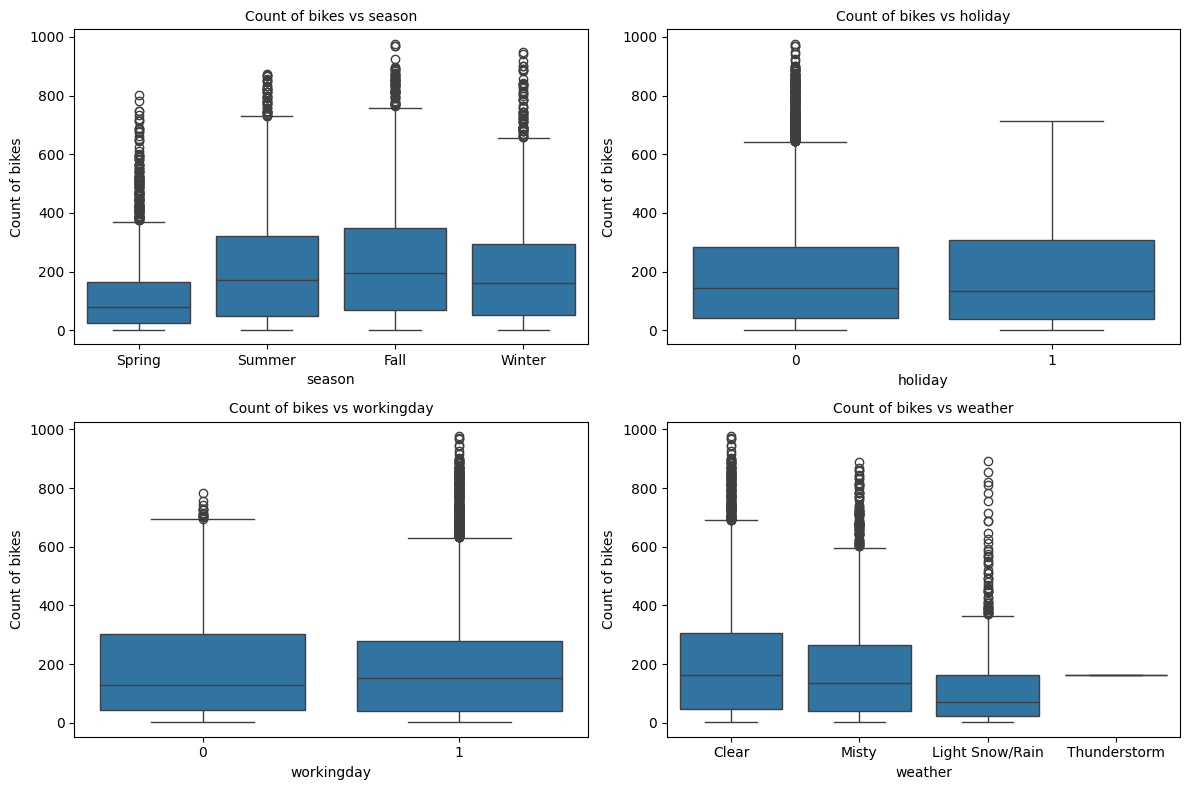

In [14]:
categorical_variables = ['season', 'holiday', 'workingday', 'weather']
season_labels = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
weather_labels = {1:'Clear',2:'Misty', 3:'Light Snow/Rain', 4:'Thunderstorm'}
plt.figure(figsize=(12, 8))
for i,col in enumerate(categorical_variables):
  plt.subplot(2,2,i+1)
  sns.boxplot(x=col,y='count',data=df)
  plt.title(f'Count of bikes vs {col}',fontdict={'fontsize':10})
  plt.ylabel('Count of bikes')
  if col=='weather':
    plt.xticks(ticks=[0,1,2,3],labels=weather_labels.values())
  elif col=='season':
    plt.xticks(ticks=[0,1,2,3],labels=season_labels.values())
plt.tight_layout()
plt.show()

- **Season:**
    - The median count of bikes is highest in the summer and lowest in the winter.
    - There is a wider spread of counts in the summer and fall, suggesting that the demand for bikes is more variable during these seasons.
- **Holiday:**
    - The median count of bikes is slightly higher on holidays than on non-holidays.
    - There is a wider spread of counts on holidays, suggesting that the demand for bikes is more variable on these days.
- **Working Day:**
    - The median count of bikes is higher on working days than on non-working days.
    - There is a wider spread of counts on working days, suggesting that the demand for bikes is more variable on these days.
- **Weather:**
    - The median count of bikes is highest when the weather is clear and lowest when the weather is thunderstorms.
    - There is a wider spread of counts when the weather is clear, suggesting that the demand for bikes is more variable on these days.

**Overall we see that there is significant impacts of every aspect above on the bike usage.**

There is also scope of additional investigation of why we are seeing high number of outliers at certain seasons and weather

## Hypothesis Testing

In [15]:
from scipy.stats import ttest_ind, shapiro, levene, f_oneway, chi2_contingency

#### Performing 2 sample T-Test for evaluating if we have significant difference of usage of bikes between working days and non working days

In [16]:
#  H0:  The mean number of bikes rented is same on working and non-working days
#  H1:  The mean number of bikes rented is different (not same) on working and non-working days
# alpha(significance level) : 0.05

working_day = df[df['workingday']==1]['count']
non_working_day = df[df['workingday']==0]['count']

# Above H0 and H1, denotes it to be a two tailed test
t_stat,p_val = ttest_ind(working_day, non_working_day)

if p_val > 0.05:
  print('T_stat: ',t_stat,'\nP-value: ',p_val, '\nFailed to reject H0')
else:
  print('T_stat: ',t_stat,'\nP-value: ',p_val, '\nReject H0')

T_stat:  1.2096277376026694 
P-value:  0.22644804226361348 
Failed to reject H0


Interpretation and Conclusion:
- From the above Test we interpret that we failed to reject the null hypothesis, which in turn means that there isnt enough evidence to prove that mean number of bikes rented significantly differs between working days and non-working days.

- We can conclude that there is no statistically signicficant impact of the day(working or non-working) on the number of bikes rented.

#### Performing 2 sample T-Test for evaluating if we have significant differnce of usage of bikes between holiday and non-holiday days.

In [17]:
#  H0:  The mean number of bikes rented is same on holiday and non-holiday days.
#  H1:  The mean number of bikes rented is different (not same) on holiday and non-holiday days.
# alpha(significance level) : 0.05

holiday = df[df['holiday']==1]['count']
non_holiday = df[df['holiday']==0]['count']

# Above H0 and H1, denotes it to be a two tailed test
t_stat,p_val = ttest_ind(holiday, non_holiday)

if p_val > 0.05:
  print('T_stat: ',t_stat,'\nP-value: ',p_val, '\nFailed to reject H0')
else:
  print('T_stat: ',t_stat,'\nP-value: ',p_val, '\nReject H0')

T_stat:  -0.5626388963477119 
P-value:  0.5736923883271103 
Failed to reject H0


Interpretation and Conclusion:
- From the above Test we see that we failed to reject the null hypothesis.

- We can conclude that there is no statistically signicficant impact of the day being holiday or not on the number of bikes rented.

#### Performing **oneway ANOVA test** for evaluating if we have significant difference of no. of bikes rented in different seasons.

In [18]:
#  H0:  The mean number of bikes rented is same for all seasons.
#  H1:  The mean number of bikes rented is different across seasons
# alpha(significance level) : 0.05

#Before going ahead with the test we need to confirm the assumptions;
#1 - Data should be normally distributed
#2 - Data is independent for each variable
#3 - Equal variances in different groups

###### Shapiro-Wilk Test

In [19]:
#To check if the data is normal distributed, use shapiro test
#H0 : The data is normally distributed
#H1 : The data isnt normally distributed
#alpha : 0.05

list_of_seasons = [df['season'].astype(int).unique()]

shapiro_tests = {season : shapiro(df[df['season']==season]['count']) for season in list_of_seasons[0]}
shapiro_tests

{1: ShapiroResult(statistic=0.8087388873100281, pvalue=0.0),
 2: ShapiroResult(statistic=0.900481641292572, pvalue=6.039093315091269e-39),
 3: ShapiroResult(statistic=0.9148160815238953, pvalue=1.043458045587339e-36),
 4: ShapiroResult(statistic=0.8954644799232483, pvalue=1.1301682309549298e-39)}

Interpretation and Conclusion:
- Using Sharpiro Test, we observe that all the season's data have p-value almost close to 0(less than alpha); which indcates of **'Rejecting Null Hypothesis'.**

- The conlclusion comes that none of the season follows the normal distribution.

#####Levene's Test

In [20]:
# H0: Groups have equal variances
# H1: Groups have different variances
# alpha = 0.05

count_by_season = [df[df['season']==season]['count'] for season in list_of_seasons[0]]
stat,p_val = levene(*count_by_season)

if p_val > 0.05:
  print('Stat: ',stat,'\nP-value: ',p_val, '\nFailed to reject H0')
else:
  print('Stat: ',stat,'\nP-value: ',p_val, '\nReject H0')

Stat:  187.7706624026276 
P-value:  1.0147116860043298e-118 
Reject H0


Interpretation and Conclusion:
- Using Levene Test, we observe that group of all the season's data have p-value less than alpha; which indcates of **'Rejecting Null Hypothesis'.**

- The conclusion comes that none of the group of season have equal variances.

#####Kruskal Wallis Test and ANOVA

In [21]:
#In above tests, we saw that the assumptions for Anova Test(Normality and Variance) are not being fulfilled.
#Hence we are going for Kruskal Wallis test as its not affected by Normality.

#  H0:  All seasons are equal in terms of number of bikes rented.
#  H1:  All seasons are not equal in terms of number of bikes rented.
# alpha(significance level) : 0.05

from scipy.stats import kruskal
kruskal_stat, p=val = kruskal(*count_by_season)

if p_val > 0.05:
  print('Kruskal Stat: ',kruskal_stat,'\nP-value: ',p_val, '\nFailed to reject H0')
else:
  print('Kruskal Stat: ',kruskal_stat,'\nP-value: ',p_val, '\nReject H0\n')

# Double Checking same via Anova

#  H0:  The mean number of bikes rented is same for all seasons.
#  H1:  The mean number of bikes rented is differnt across seasons
# alpha(significance level) : 0.05
f_stat, p_val = f_oneway(*count_by_season)

if p_val > 0.05:
  print('\nF-Stat: ',f_stat,'\nP-value: ',p_val, '\nFailed to reject H0')
else:
  print('F-Stat: ',f_stat,'\nP-value: ',p_val, '\nReject H0')

Kruskal Stat:  699.6668548181988 
P-value:  1.0147116860043298e-118 
Reject H0

F-Stat:  236.94671081032106 
P-value:  6.164843386499654e-149 
Reject H0


Interpretation and Conclusion:
- Using Anova and Kruskal Wallis test, it is interpreted that the p value is less than the significance value.

- Inspite of the assumptions of normality and variancenot being fulfilled, ANOVA test suggests there is significant difference between no. of bikes across seasons.

- This concludes that there is significant differnce statistically between mean number of bikes rented across different seasons.

#### Performing **oneway ANOVA test** for evaluating if we have significant difference of no. of bikes rented across different weather conditions.

In [22]:
#  H0:  The mean number of bikes rented is same for all waether conditions.
#  H1:  The mean number of bikes rented is different across weather conditions.
# alpha(significance level) : 0.05

#Before going ahead with the test we need to confirm the assumptions;
#1 - Data should be normally distributed
#2 - Data is independent for each variable
#3 - Equal variances in different groups

#####Shapiro- Wilk Test

In [23]:
#To check if the data is normal distributed, use shapiro test
#H0 : The data is normally distributed
#H1 : The data isnt normally distributed
#alpha : 0.05

weather_1 = [df[df['weather']==1]['count']]
weather_2 = [df[df['weather']==2]['count']]
weather_3 = [df[df['weather']==3]['count']]
weather_4 = [df[df['weather']==4]['count']]

shapiro_weather_test = {1:shapiro(weather_1),2:shapiro(weather_2),3:shapiro(weather_3),4:shapiro(weather_4)}
shapiro_weather_test


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ValueError: Data must be at least length 3.

Interpretation:
- The Shapiro-Wilk test for normality encountered an issue because one or more weather categories do not have enough data points (at least 3) to perform the test.

This situation can arise if certain weather conditions are very rare in the dataset.

#####Levene's Test For variance check across Weather conditions

In [24]:
# H0: Groups have equal variances
# H1: Groups have different variances
# alpha = 0.05

list_of_weathers = [df['weather'].astype(int).unique()]
count_by_weather = [df[df['weather']==weather]['count'] for weather in list_of_weathers[0]]
stat,p_val = levene(*count_by_weather)

if p_val > 0.05:
  print('Stat: ',stat,'\nP-value: ',p_val, '\nFailed to reject H0')
else:
  print('Stat: ',stat,'\nP-value: ',p_val, '\nReject H0')

Stat:  54.85106195954556 
P-value:  3.504937946833238e-35 
Reject H0


Interpretation and Conclusion:
- Using Levene Test, we observe that group of all the weather's data have p-value less than alpha; which indcates of **'Rejecting Null Hypothesis'.**

- The conclusion comes that variances across different weather conditions is not equal.

#####Kruskal Wallis Test and ANOVA

In [25]:
#Going for Kruskal Wallis test as its not affected by Normality.

#  H0:  All weathers are equal in terms of number of bikes rented.
#  H1:  All weathers are not equal in terms of number of bikes rented.
# alpha(significance level) : 0.05

from scipy.stats import kruskal
kruskal_stat, p=val = kruskal(*count_by_weather)

if p_val > 0.05:
  print('Kruskal Stat: ',kruskal_stat,'\nP-value: ',p_val, '\nFailed to reject H0')
else:
  print('Kruskal Stat: ',kruskal_stat,'\nP-value: ',p_val, '\nReject H0\n')


# Double Checking same via Anova

#  H0:  The mean number of bikes rented is same for all weathers.
#  H1:  The mean number of bikes rented is differnt across weathers
# alpha(significance level) : 0.05
f_stat, p_val = f_oneway(*count_by_weather)

if p_val > 0.05:
  print('\nF-Stat: ',f_stat,'\nP-value: ',p_val, '\nFailed to reject H0')
else:
  print('F-Stat: ',f_stat,'\nP-value: ',p_val, '\nReject H0')

Kruskal Stat:  205.00216514479087 
P-value:  3.504937946833238e-35 
Reject H0

F-Stat:  65.53024112793271 
P-value:  5.482069475935669e-42 
Reject H0


Interpretation and Conclusion:
- Using Anova and Kruskal Wallis test, it is interpreted that the p value is less than the significance value.

- This concludes that there is significant difference statistically between mean number of bikes rented across different weather conditions.

#### Performing **Chi-squared test** for evaluating if weather conditions are independent/dependent on the seasons.

In [26]:
#  H0:  Weather conditions are independent of the season
#  H1:  Weather conditions are dependent on the season
# alpha(significance level) : 0.05

contingency_table = pd.crosstab(df['weather'],df['season'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

if p_val > 0.05:
  print('Chi_stat: ',chi2_stat,'\nP-value: ',p_val, '\ndof: ',dof, '\nFailed to reject H0')
else:
  print('Chi_stat: ',chi2_stat,'\nP-value: ',p_val, '\ndof: ',dof, '\nReject H0')

Chi_stat:  49.15865559689363 
P-value:  1.5499250736864862e-07 
dof:  9 
Reject H0


Interpretation and Conclusion:
- From the above Chi-Square Test, we see that we reject the null hypothesis.

- We can conclude that the weather conditions are dependent on the season. This seems to be a logical out come considering weather patterns; like we can see certain weather conditions in a particular season only, which makes them dependent.

##Conclusions and Recommendations
- Yulu can consider a boost in their operations and marketing during the seasonal and weather variations. Like they should try to provide more bikes at the relevants stations when there is favorable climate based on season and weather. This could really show a significant improvement in their bike rented/usage count.
- Eventhough we saw that there isnt any significant difference in the bike usage on working days, we can still see slight more improvement in bike rentals during this days.
- The insights made from this above analysis can be used to make decisions for allocating resources and planning strategically